# Dataset link: [Diabetes 130-US hospitals for years 1999-2008](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)


# Import Libraries

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE,SMOTENC
from tqdm import tqdm
from dataclasses import dataclass
from collections import Counter

# Importing the ML algorithms
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense



# Import Original Dataset

In [ ]:
# Data Reading
Original_df=pd.read_csv("diabetic_data_uci.csv")

In [ ]:
Copy_df = Original_df.copy()

In [ ]:
Copy_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Code block to analyze the improtance of features
print(Copy_df.describe())

#Printing the data types and missing values
print(Copy_df.info())

#Getting the unique values for each column
print("\nUnique Values in Each Column:")
for col in Copy_df.columns:
    print(f"\nColumn: {col}")
    print(Copy_df[col].value_counts())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000




1.   **Gender has Unknown/Invalid values as per our summary**
2.   **Missing values have been represented with ? which needs to be processed**


In [ ]:
Copy_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

# Exploratory Data Analysis


In [ ]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Univariate Analysis


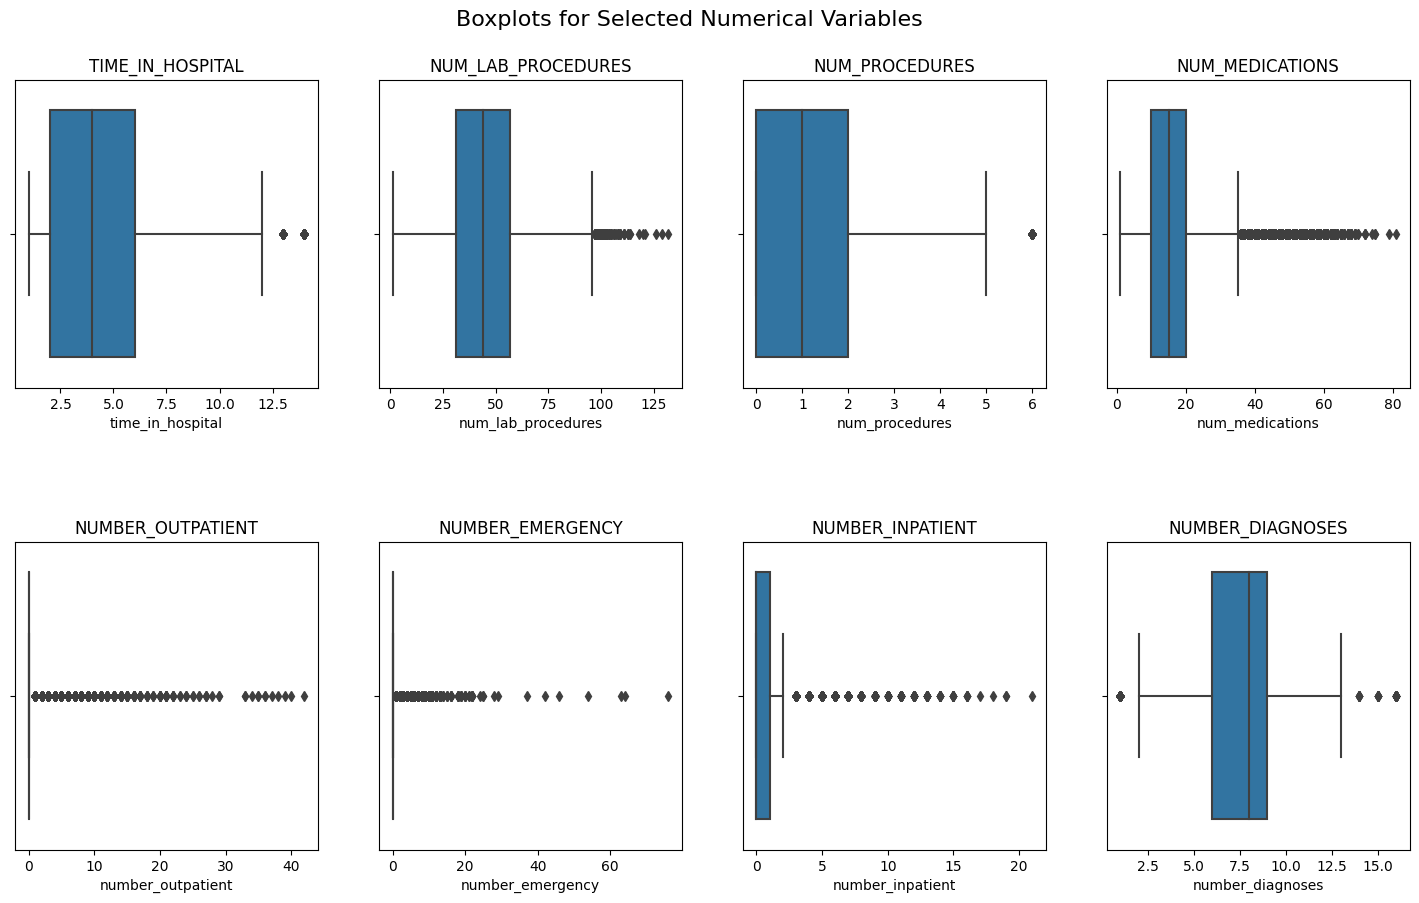

In [ ]:
# Subsetting a different set of numerical columns for analysis
selected_numeric_features = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]
df_selected_numeric = Copy_df[selected_numeric_features]

# Generating Box plots to explore the distribution of selected numerical variables
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots for Selected Numerical Variables", fontsize=16, y=0.95)

# Loop through the selected columns and create individual boxplots
for idx, column in enumerate(df_selected_numeric.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a boxplot for the current variable
    sns.boxplot(x=df_selected_numeric[column], ax=ax)
    # Set the title for the subplot
    ax.set_title(column.upper())

# Display the plots
plt.show()


* there are outlier present in all the numerical variables
* number_outpatient, numer_emergency, and number_inpatient are very skewed , with most of the values being zero


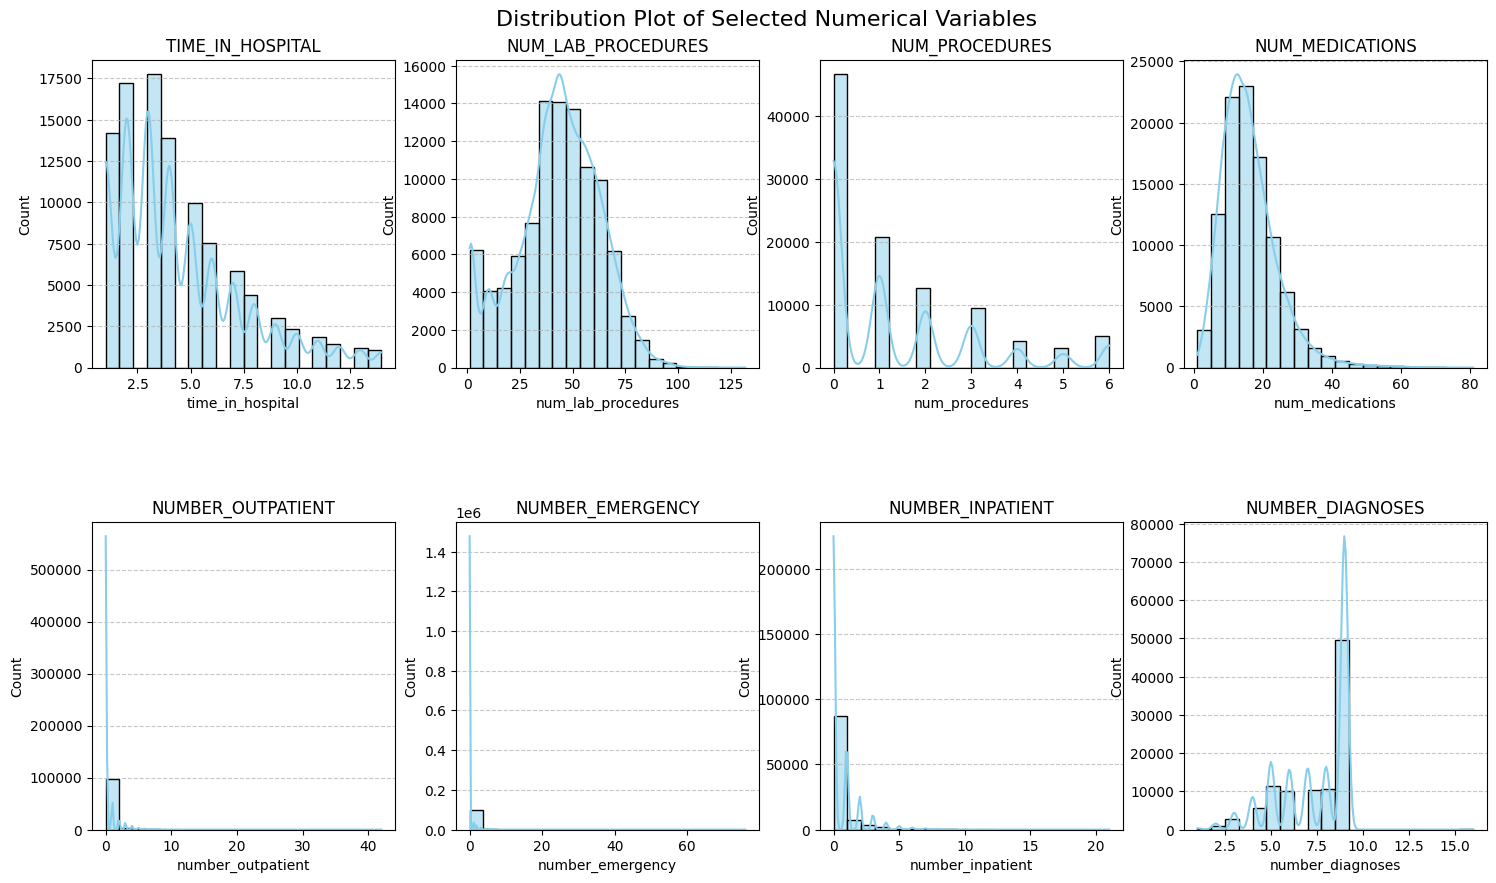

In [ ]:
# Generating distribution plots to explore the distribution of selected numerical variables
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution Plot of Selected Numerical Variables", fontsize=16, y=0.93)

# Loop through the selected columns and create individual distribution plots
for idx, column in enumerate(df_selected_numeric.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a distribution plot for the current variable
    sns.histplot(df_selected_numeric[column], kde=True, ax=ax, bins=20, color='skyblue')
    # Set the title for the subplot
    ax.set_title(column.upper())
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.show()


* num_medications and time_in_hospital are slightly right skewed
* As observed in the boxplots number_outpatient and number_emergency are heavily skewed with many variables being zero

## Generating visualizations for categorical columns

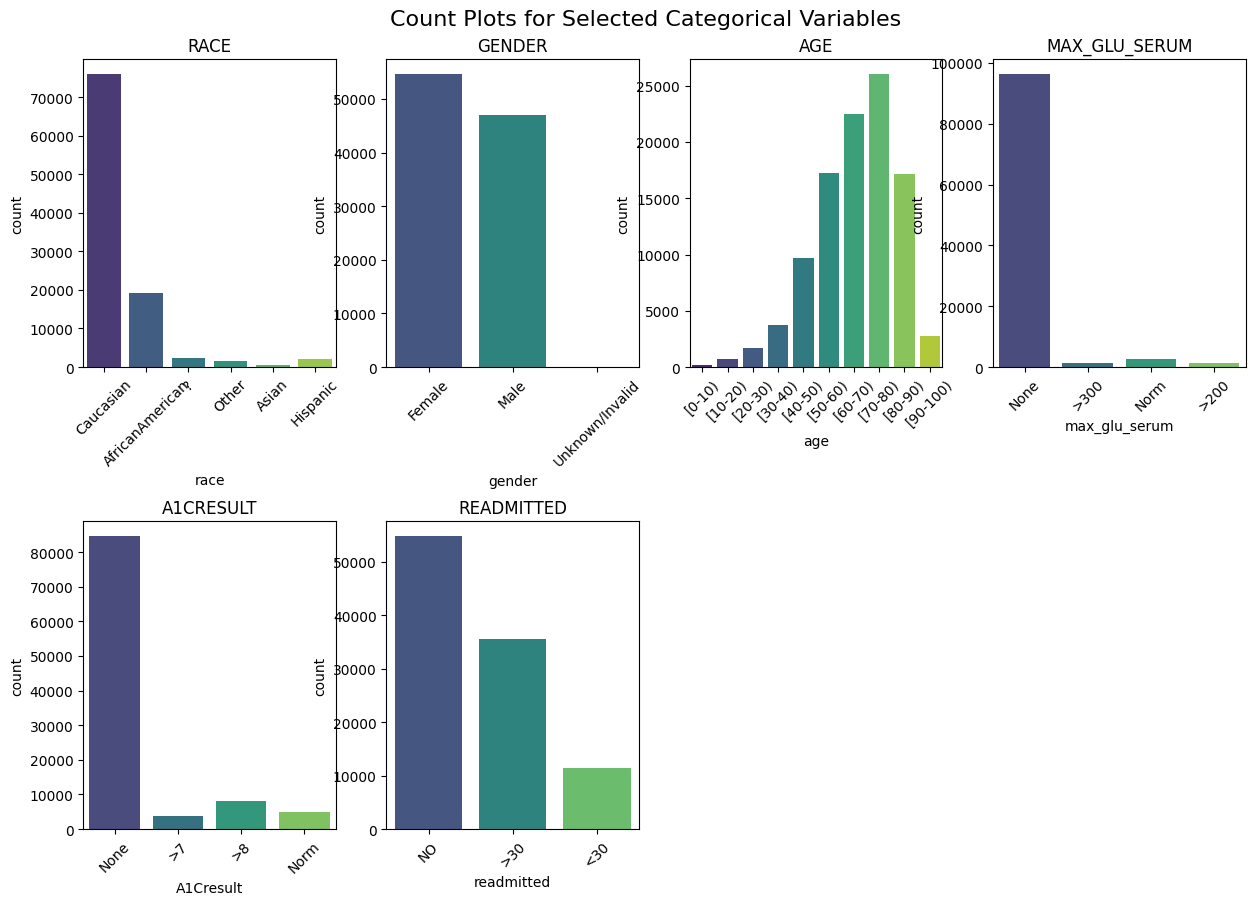

In [ ]:
# Subsetting a different set of categorical columns for analysis
selected_categorical_features = ["race", "gender", "age", "max_glu_serum", "A1Cresult", "readmitted"]
df_selected_categorical = Copy_df[selected_categorical_features]

# Generating count plots to explore the distribution of selected categorical variables
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Count Plots for Selected Categorical Variables", fontsize=16, y=0.93)

# Loop through the selected columns and create individual count plots
for idx, column in enumerate(df_selected_categorical.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a count plot for the current categorical variable
    sns.countplot(data=df_selected_categorical, x=column, ax=ax, palette='viridis')
    # Set the title for the subplot
    ax.set_title(column.upper())
    # Add rotation for better readability of x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Display the plots
plt.show()




*  Majority of patients are Caucasian by race
*  Number of female patients are slightly higher than number of male patients
* More patients are of age 75
* Higher number of female patients are readmitted as compared to male patients






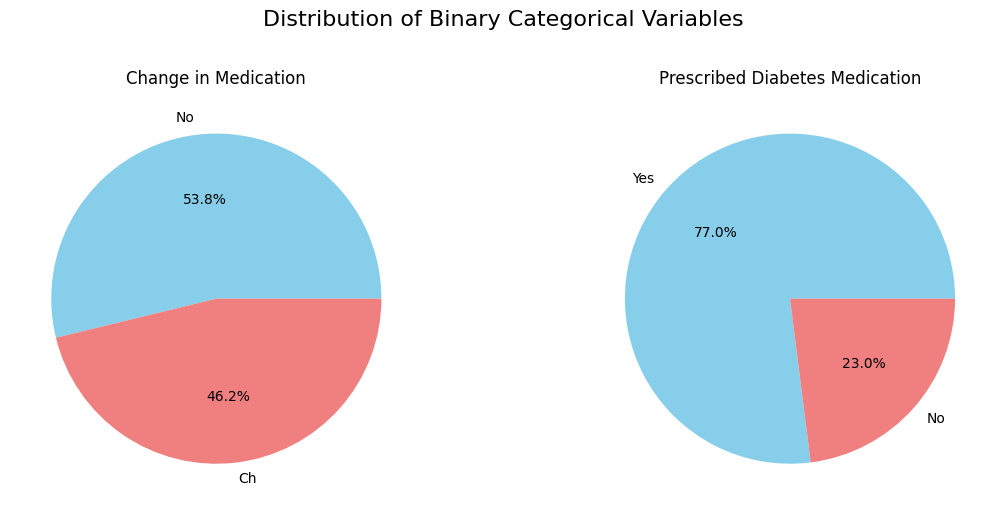

In [ ]:
# Subsetting the binary categorical columns for analysis
binary_categorical_features = ["change", "diabetesMed"]
df_binary_categorical = Copy_df[binary_categorical_features]

# Set up a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.suptitle("Distribution of Binary Categorical Variables", fontsize=16, y=1.02)

# Pie chart for "change"
ax1 = axes[0]
change_counts = df_binary_categorical['change'].value_counts()
ax1.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax1.set_title("Change in Medication")

# Pie chart for "diabetesMed"
ax2 = axes[1]
diabetesMed_counts = df_binary_categorical['diabetesMed'].value_counts()
ax2.pie(diabetesMed_counts, labels=diabetesMed_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title("Prescribed Diabetes Medication")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


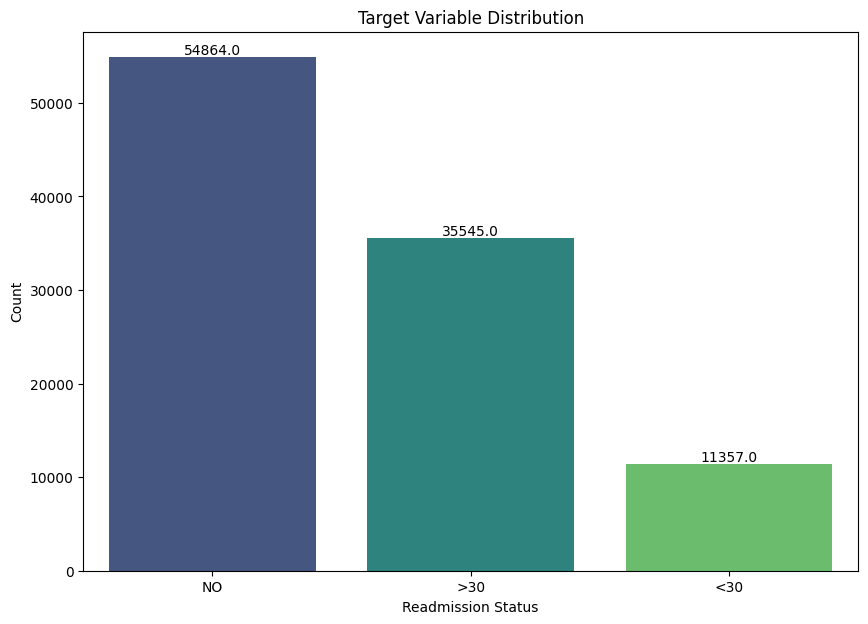

In [ ]:
plt.figure(figsize=(10, 7))

# Using countplot for better representation of categorical data
ax = sns.countplot(x='readmitted', data=df_selected_categorical, palette='viridis')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Target Variable Distribution')
plt.xlabel('Readmission Status')
plt.ylabel('Count')

# Show the plot
plt.show()


##Bivariate Plots


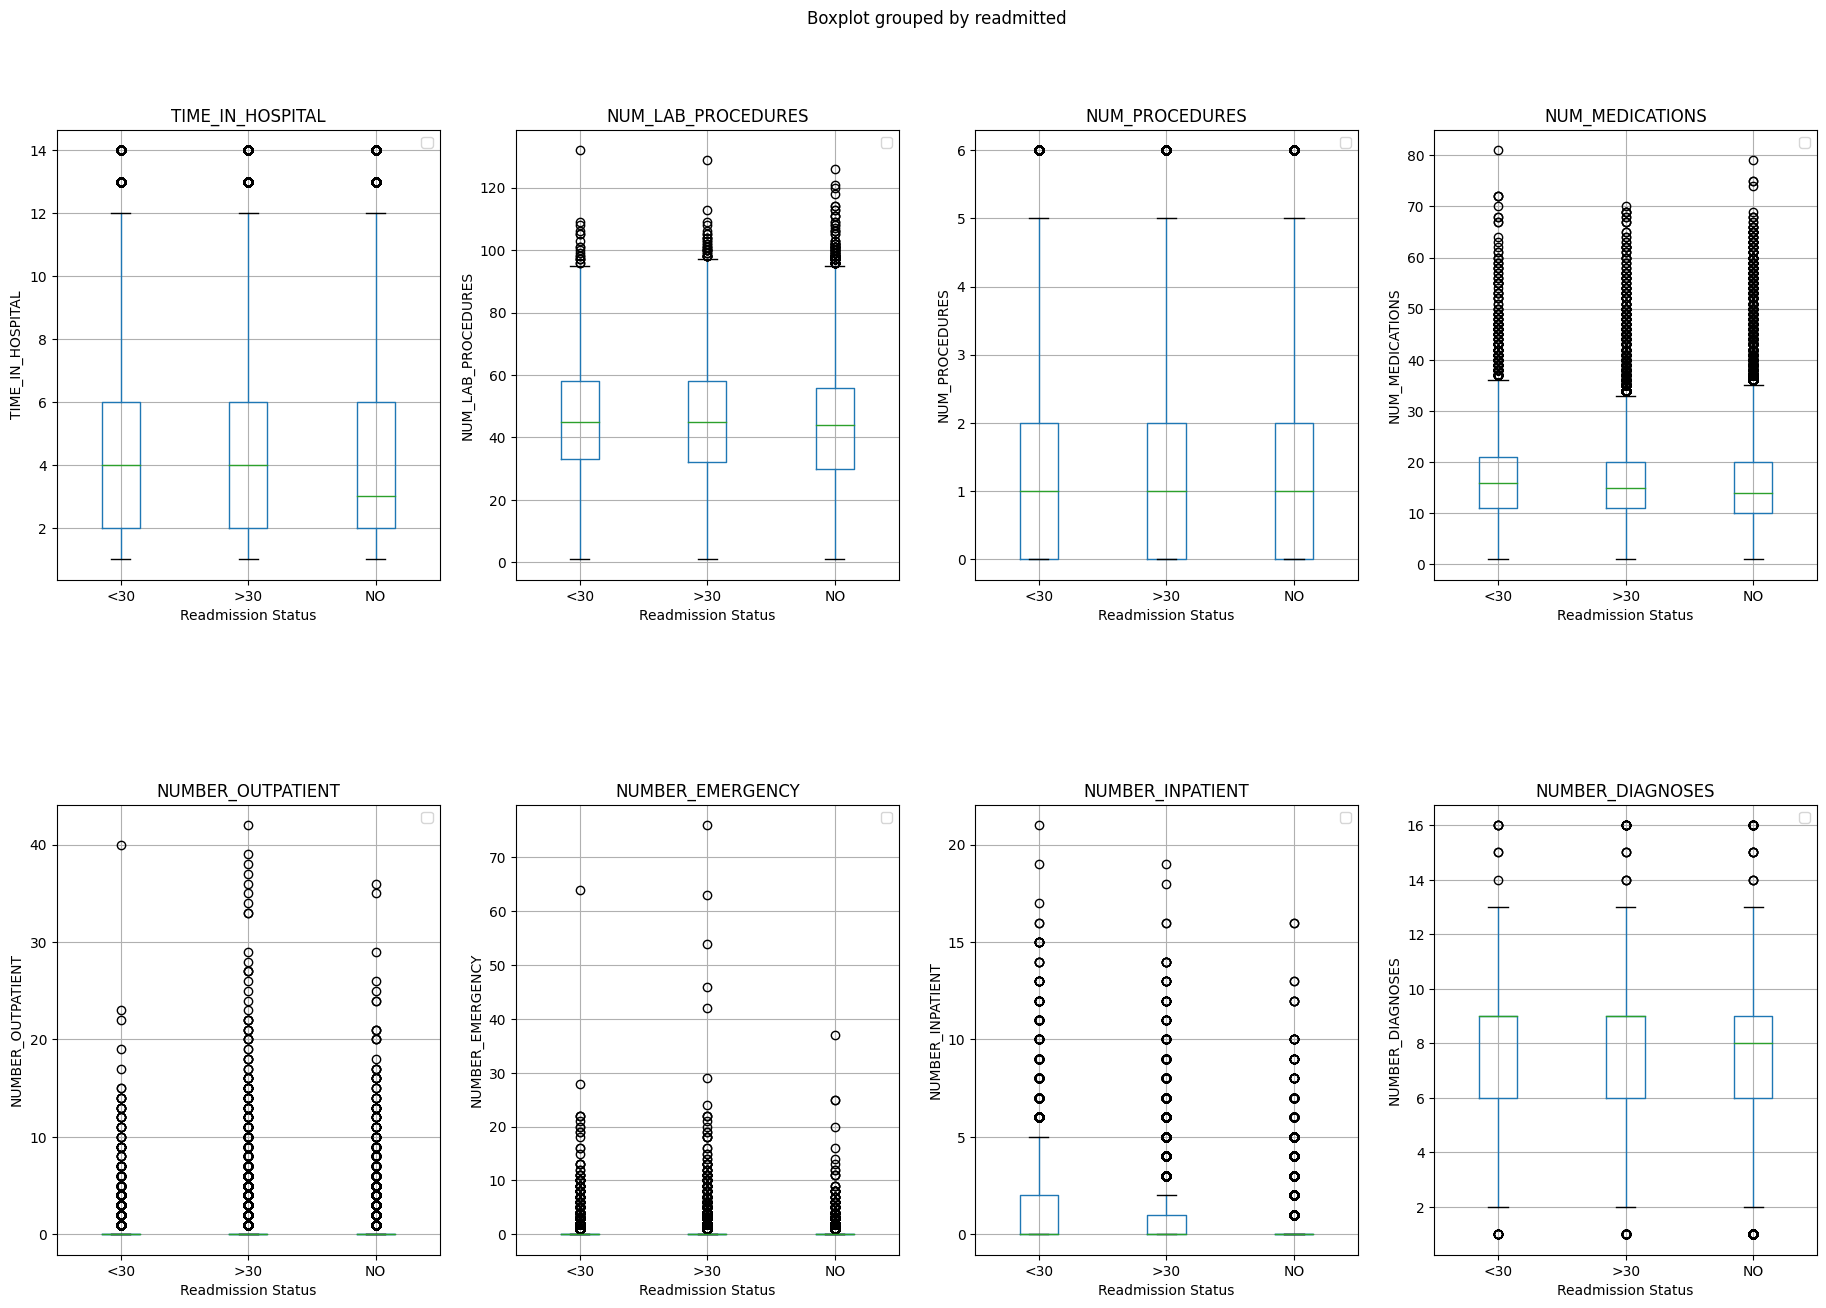

In [ ]:
df_box1 = Copy_df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses","readmitted"]]

# Set the figure size
plt.figure(figsize=(22, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Bar Plots for Categorical Variables", fontsize=18, y=0.93)

# Loop through the column names and track the axes
for n, col_name in enumerate(df_box1.columns[:-1]):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)
    df_box1.boxplot(column='{}'.format(col_name), by='readmitted', ax=ax)
    ax.set_title(col_name.upper())
    ax.set_xlabel('Readmission Status')  # Add x-axis label
    ax.set_ylabel(col_name.upper())  # Add y-axis label

    # Add legend if needed
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

# Show the plots
plt.show()


* The variables num_lab_procedures and num_procedures do not appear to have a substantial variation between the distributions according to the target class.
* The variables number_emergency and number_outpatient appear to be highly skewed and have a considerable number of outliers.
* The variables number_medications, number_inpatient, and number_diagnoses have differences between the classes of the targeted variables.


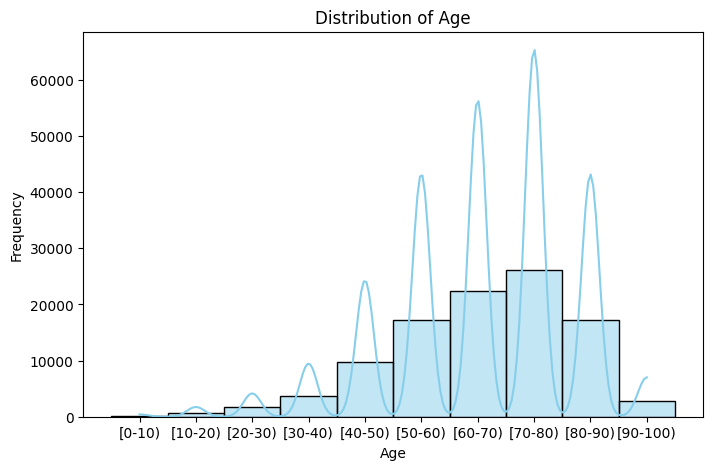

In [ ]:
# Kernel Density Plot for the Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(Copy_df['age'], kde=True, color='skyblue', bins=15)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# # Violin Plot for Number of Lab Procedures by Gender:

# plt.figure(figsize=(10, 6))
# sns.violinplot(x='gender', y='num_lab_procedures', data=Copy_df, palette='Pastel1')
# plt.title('Number of Lab Procedures by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Number of Lab Procedures')
# plt.show()


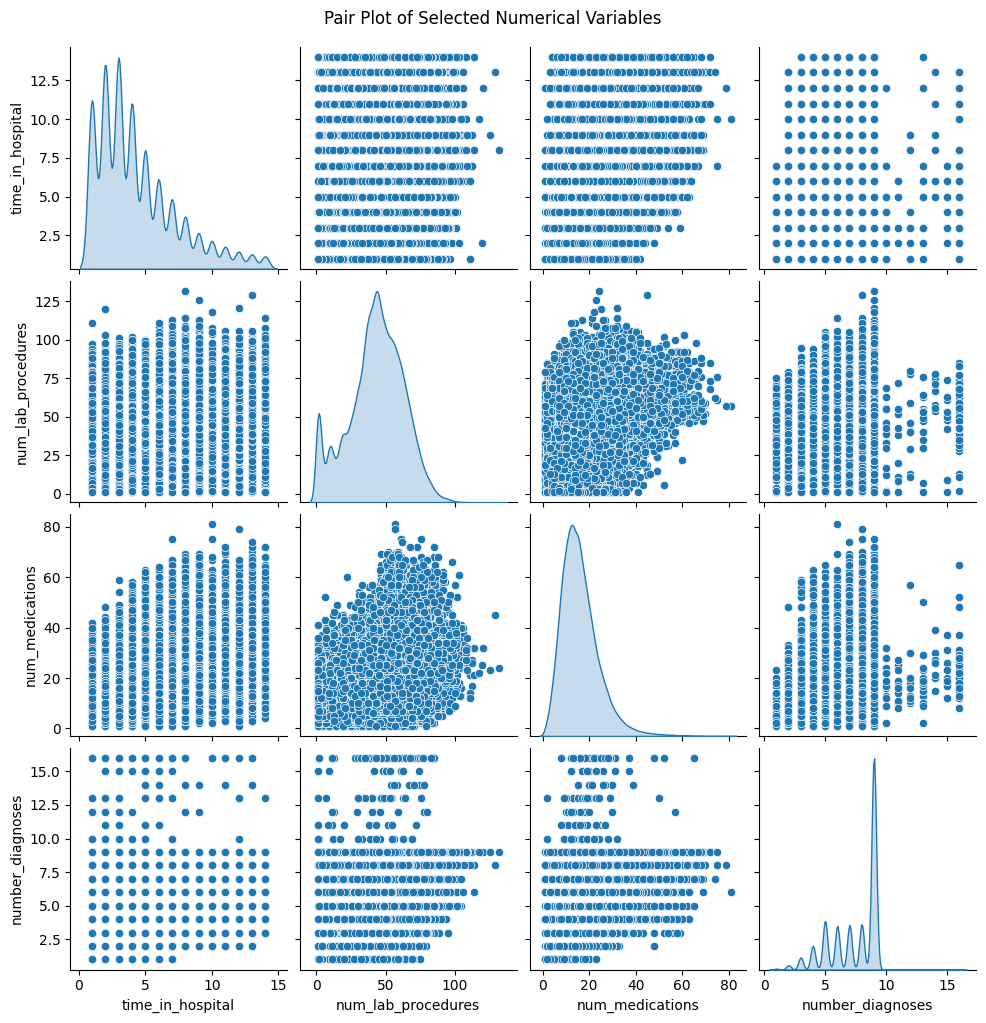

In [ ]:
# Pair Plot for Selected Numerical Variables:

selected_numerical_features = ["time_in_hospital", "num_lab_procedures", "num_medications", "number_diagnoses"]
sns.pairplot(Copy_df[selected_numerical_features], diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()


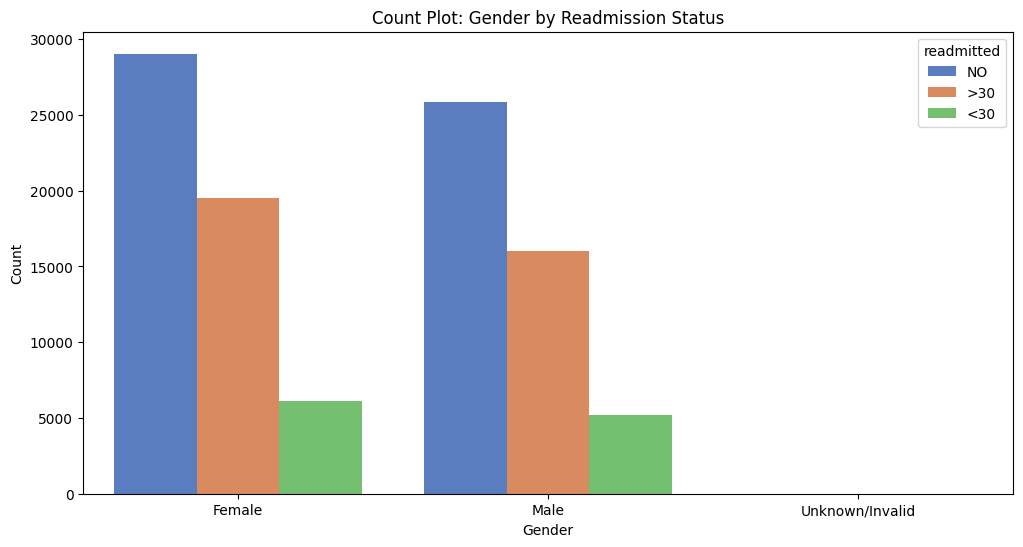

In [ ]:
# Categorical Plots for Gender and Readmission Status:

plt.figure(figsize=(12, 6))
sns.countplot(data=Copy_df, x='gender', hue='readmitted', palette='muted')
plt.title('Count Plot: Gender by Readmission Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


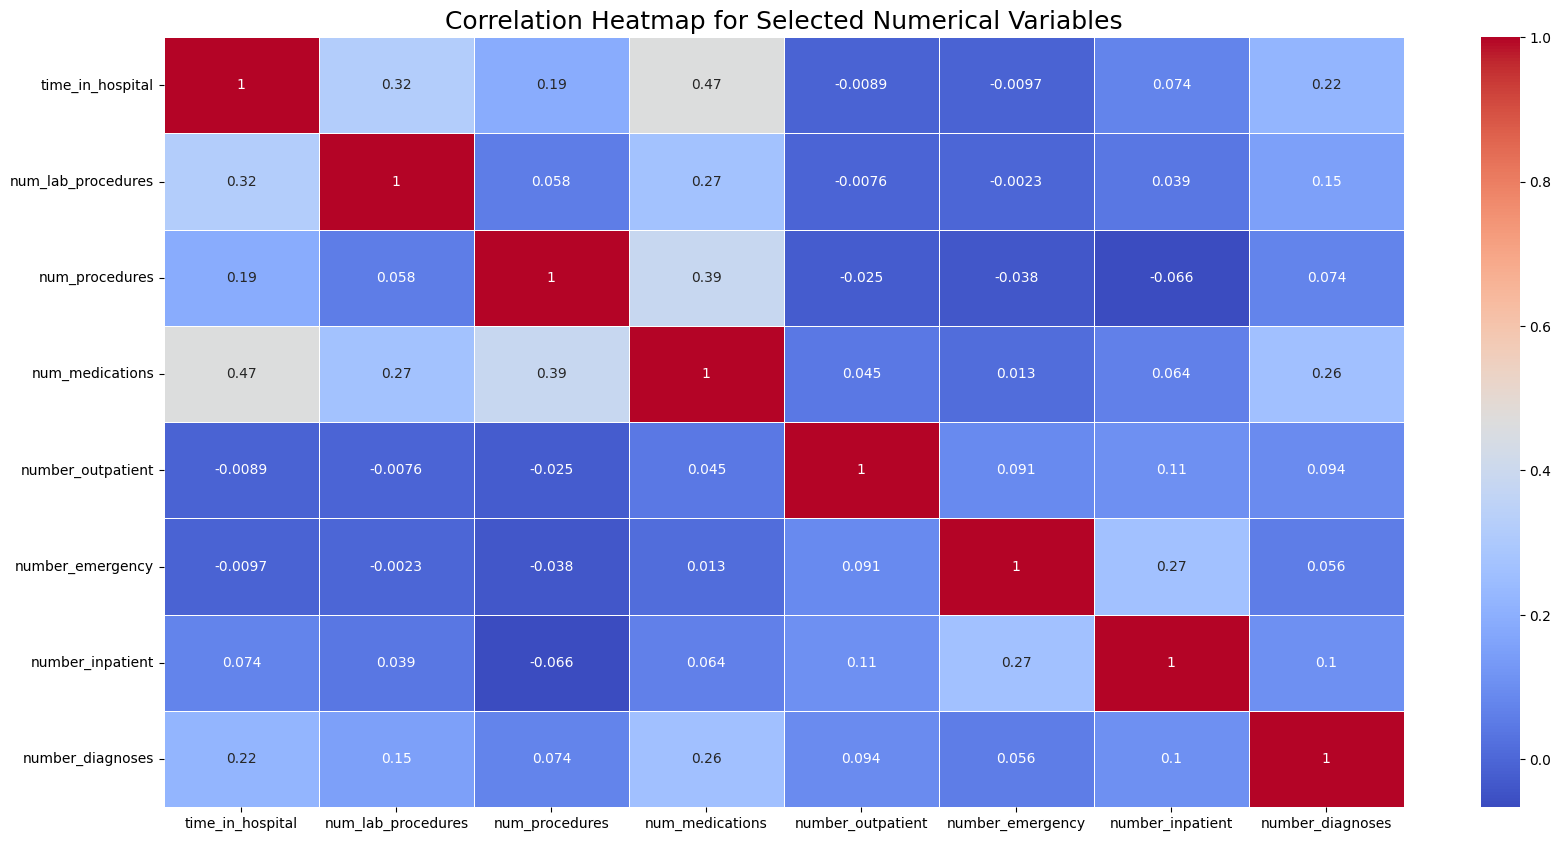

In [ ]:
plt.figure(figsize=(20, 10))

# Create a heatmap for the correlation matrix of selected numerical variables
heatmap_data = df_selected_numeric.corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Numerical Variables', fontsize = 18)

#plt.savefig('Correlation_Heatmap.png', transparent=False)
plt.show()


* The most significant connection is between the number of medications and the length of stay in the hospital, however it is only 0.47 and not a reliable indicative of a linear relationship.

In [ ]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['age', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="age", y="Count", color="readmitted",
             title="Readmission Distribution according to Age",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [ ]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['race', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="race", y="Count", color="readmitted",
             title="Readmission Distribution according to Race",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [ ]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['gender', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="gender", y="Count", color="readmitted",
             title="Readmission Distribution according to Gender",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [ ]:
#correlation matrix of selected numerical variables
corr_matrix = np.corrcoef(df_selected_numeric, rowvar=False)
fig = px.imshow(corr_matrix, labels=dict(x='Selected Numerical Variables', y='Selected Numerical Variables'), x=df_selected_numeric.columns, y=df_selected_numeric.columns, title='Correlation Heatmap')
fig.show()


In [ ]:
#Distribution of Admission Types by admission_id

fig = px.pie(Copy_df, names='admission_type_id', title='Distribution of Admission Types')
fig.show()


# Feature Engineering

Since we do not use any imputation in the upcoming steps, we do not split the dataset before feature engineering. The only preprocessing methods used are irrelevant feature dropping and encoding which has been performed on the entire dataset



*   **The categorical values will have to be encoded for the model**
*   **Handling the null values by coverting them to NaN and then checking columns for more than required (30%) null values**



In [ ]:
# replacing ? and invalid values with with Nan
Copy_df = Copy_df.replace(["?", "Unknown/Invalid"], np.nan)
# Checking for % of null values
(Copy_df.isna().sum()*100/len(Copy_df))[(Copy_df.isna().sum()*100/len(Copy_df))>30]

weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
dtype: float64

**Dropping the columns Weight, Payer_Code and Medical_Speciality**



In [ ]:
Copy_df=Copy_df.drop(['weight','payer_code','medical_specialty'],axis=1)

**Checking the percentage of null values**

In [ ]:
null_percentage = (Copy_df.isna().sum() * 100 / len(Copy_df))
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

race      2.233555
gender    0.002948
diag_1    0.020636
diag_2    0.351787
diag_3    1.398306
dtype: float64



*   All the columns do not have more than 3% missing values
*   There are only two options either imputing them or dropping them. Imputing however is not recommended in the healthcare setting. thus if the percentage of loss of dropping is less, we can decide to drop them
*   For, this we have to find the % loss for rows to see the impact of dropping them








In [ ]:
(Copy_df.shape[0]-Copy_df.dropna(axis=0).shape[0])*100/Copy_df.dropna(axis=0).shape[0]

3.7877860726961203

**Since the loss is just 3% we can proceed with dropping these rows without losing too much information**

In [ ]:
Copy_df.dropna(axis=0,inplace=True)

In [ ]:
Copy_df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

**Now there are no missing values in the dataset**

In [ ]:
# Checking the distribution of the categorical variables 'examide' and 'citoglipton'
print(Copy_df['examide'].value_counts())
print(Copy_df['citoglipton'].value_counts())

# Since within the boundaries of our dataset both 'examide' and 'citoglipton' have only one category we will be dropping these columns as they don't add much value for prediction
Copy_df = Copy_df.drop(columns=['examide', 'citoglipton'])

No    98052
Name: examide, dtype: int64
No    98052
Name: citoglipton, dtype: int64


In [ ]:
# Printing the df to verify
Copy_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


Now we have the basic processed data to use for our model

In [ ]:
Copy_df.to_csv('clean_data.csv', index=False)
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Coming to the data dictionary,**
*   **The categories within 'admission type', 'discharge disposition', and 'admission source' are similar, so by merging these categories, we can decrease the number of columns created during the encoding process.**
*   **For the 'admission_type' column, similar categories are remapped as follows: 'Urgent' (2) and 'Trauma Center' (7) are combined into the 'Emergency' (1) category. Additionally, 'NULL' (6) and 'Not Mapped' (8) are consolidated into the 'Not Available' (5) category.**
*   **For the 'discharge_disposition' column, similar categories are remapped: e.g. 'Discharged/transferred to home with home health service' (6), 'Discharged/transferred to home under care of Home IV provider' (8) and 'Hospice / home' (13) are combined into the 'Discharged to home' (1) category.**
*   **For the 'admission_source' column, similar categories are remapped: e.g. 'Clinic Referral' (2) and 'HMO Referral' (3) are combined into the ' Physician Referral' (1) category.**

In [ ]:
Copy_df = pd.read_csv('clean_data.csv')

In [ ]:
def remap_admission_type(admission_type_id):
    if admission_type_id in [2, 7]:
        return 1  # Urgent and Trauma Center is mapped to Emergency
    elif admission_type_id in [6, 8]:
        return 5  # NULL and Not Mapped are mapped to Not Available
    else:
        return admission_type_id

Copy_df['admission_type_id'] = Copy_df['admission_type_id'].apply(remap_admission_type)


In [ ]:
def remap_discharge_disposition(discharge_disposition_id):
    if discharge_disposition_id in [6, 8, 13]:
        return 1  # Merging categories into 1
    elif discharge_disposition_id in [9, 12, 15, 16, 17]:
        return 5  # Merging categories into 5
    elif discharge_disposition_id in [3, 4, 5, 14, 22, 23, 24]:
        return 2  # Merging categories into 2
    elif discharge_disposition_id in [25, 26]:
        return 18  # Merging categories into 18
    else:
        return discharge_disposition_id

Copy_df['discharge_disposition_id'] = Copy_df['discharge_disposition_id'].apply(remap_discharge_disposition)


In [ ]:
def remap_admission_source(admission_source_id):
    if admission_source_id in [2, 3]:
        return 1  # Merging categories into 1
    elif admission_source_id in [5, 6, 10, 22, 25]:
        return 4  # Merging categories into 4
    elif admission_source_id in [15, 17, 20, 21]:
        return 9  # Merging categories into 9
    elif admission_source_id in [13, 14]:
        return 11  # Merging categories into 11
    else:
        return admission_source_id

Copy_df['admission_source_id'] = Copy_df['admission_source_id'].apply(remap_admission_source)


**Encoding of variables**

In [ ]:
# Using replace function to combine categories and encode them to numerical values
Copy_df['change'] = Copy_df['change'].replace({'Ch': 1, 'No': 0})
Copy_df['gender'] = Copy_df['gender'].replace({'Male': 1, 'Female': 0})
Copy_df['diabetesMed'] = Copy_df['diabetesMed'].replace({'Yes': 1, 'No': 0})

**Ecoding to combine categories**

In [ ]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
Copy_df[medicine_columns] = Copy_df[medicine_columns].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

**Revising the variables in test result columns such as 'A1cresult' and 'max_glu_serum', where the 'None' value is assigned a negative numerical representation for differentiation purposes.**

In [ ]:
Copy_df['A1Cresult'] = Copy_df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'None': -100})
Copy_df['max_glu_serum'] = Copy_df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -100})

**Age is given as a range. Thus taking midpoints to replace it as a single value to see patterns**



In [ ]:
Copy_df.age.value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [ ]:
age_midpoints = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
Copy_df['age'] = Copy_df['age'].replace(age_midpoints)


**Finally, we encode the target variable as we are looking to deal with a binary classification problem. thus we will consider just two categories i.e., <= 30 days is readmitted while >30 and NO are not readmitted**

In [ ]:
# Encoding the Target Variable using a lambda function
Copy_df['readmitted'] = Copy_df['readmitted'].apply(lambda x: 0 if x in ['>30', 'NO'] else 1)

**Processing the diagnosis variable by grouping them into specific diagnostic categories, thereby streamlining the number of variables produced for each diagnostic field.**

In [ ]:
# Use the next block as another way
'''
def categorize_diagnosis(x):
    x = str(x)
    if "V" in x or "E" in x:
        return "Other"
    elif "250" in x:
        return "Diabetes"
    try:
        x = int(float(x))
        if 390 <= x <= 459 or x == 785:
            return "Circulatory"
        elif 460 <= x <= 519 or x == 786:
            return "Respiratory"
        elif 520 <= x <= 579 or x == 787:
            return "Digestive"
        elif 580 <= x <= 629 or x == 788:
            return "Genitourinary"
        elif 140 <= x <= 239:
            return "Neoplasms"
        elif 710 <= x <= 739:
            return "Musculoskeletal"
        elif 800 <= x <= 999:
            return "Injury"
    except ValueError:
        pass
    return "Other"

# Apply the categorize_diagnosis function to the 'diag_1' column
Copy_df['diag_cat'] = Copy_df['diag_1'].apply(categorize_diagnosis)

# Drop the 'diag_2' and 'diag_3' columns
Copy_df = Copy_df.drop(['diag_2', 'diag_3'], axis=1)
'''

'\ndef categorize_diagnosis(x):\n    x = str(x)\n    if "V" in x or "E" in x:\n        return "Other"\n    elif "250" in x:\n        return "Diabetes"\n    try:\n        x = int(float(x))\n        if 390 <= x <= 459 or x == 785:\n            return "Circulatory"\n        elif 460 <= x <= 519 or x == 786:\n            return "Respiratory"\n        elif 520 <= x <= 579 or x == 787:\n            return "Digestive"\n        elif 580 <= x <= 629 or x == 788:\n            return "Genitourinary"\n        elif 140 <= x <= 239:\n            return "Neoplasms"\n        elif 710 <= x <= 739:\n            return "Musculoskeletal"\n        elif 800 <= x <= 999:\n            return "Injury"\n    except ValueError:\n        pass\n    return "Other"\n\n# Apply the categorize_diagnosis function to the \'diag_1\' column\nCopy_df[\'diag_cat\'] = Copy_df[\'diag_1\'].apply(categorize_diagnosis)\n\n# Drop the \'diag_2\' and \'diag_3\' columns\nCopy_df = Copy_df.drop([\'diag_2\', \'diag_3\'], axis=1)\n'

In [ ]:
# Define the function to check for diabetes in three columns of a DataFrame
def combined_diagnosis(row):
    # Define the inner function to check a single diagnosis code
    def is_diabetes(code):
        code = str(code)
        return '250' in code  # Assuming '250' is the code for diabetes

    # Check each of the three columns for diabetes
    for col in ['diag_1', 'diag_2', 'diag_3']:
        if is_diabetes(row[col]):
            return 'Diabetes'

    # If none of the columns contain '250', return 'Other'
    return 'Other'

# Apply the function to each row of the DataFrame
Copy_df['diag_cat'] = Copy_df.apply(combined_diagnosis, axis=1)
Copy_df = Copy_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

**For the final preprocessed data, we will do One Hot Encoding**

In [ ]:
# Using get_dummies to generate encoded columns for specified categories in Copy_df
Copy_df = pd.get_dummies(Copy_df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                           'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_cat'], drop_first=True)

# Creating dummy variables for 'race' and concatenate them with Copy_df
race_dummies = pd.get_dummies(Copy_df['race'])
Copy_df = pd.concat([Copy_df, race_dummies], axis=1)
Copy_df.drop(['race'], inplace=True, axis=1)

# Displaying the first few rows
print(Copy_df.head())

# Dropping duplicates based on 'patient_nbr', keeping the first occurrence
Copy_df = Copy_df.drop_duplicates(subset='patient_nbr', keep='first')


   encounter_id  patient_nbr  age  time_in_hospital  num_lab_procedures  \
0        149190     55629189   15                 3                  59   
1         64410     86047875   25                 2                  11   
2        500364     82442376   35                 2                  44   
3         16680     42519267   45                 1                  51   
4         35754     82637451   55                 3                  31   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0               18                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               6               16                  0                 0   

   number_inpatient  number_diagnoses  metformin  repaglinide  nateglinide  \
0                 0 

In [ ]:
Copy_df.to_csv('final_data.csv', index=False)
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Copy_df.dtypes

encounter_id          int64
patient_nbr           int64
age                   int64
time_in_hospital      int64
num_lab_procedures    int64
                      ...  
AfricanAmerican       uint8
Asian                 uint8
Caucasian             uint8
Hispanic              uint8
Other                 uint8
Length: 64, dtype: object

# Modeling

## Modeling without PCA

**K-fold cross validation function to show bias variance tradeoff**

In [ ]:
import numpy as np

def k_fold_split(X, y, k=5):
    fold_size = int(len(X) / k)
    X_folds = []
    y_folds = []

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else len(X)
        test_idx = indices[start:end]
        train_idx = np.concatenate([indices[:start], indices[end:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        X_folds.append((X_train, X_test))
        y_folds.append((y_train, y_test))

    return X_folds, y_folds


### Logistic Regression

In [ ]:
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

@dataclass
class LogisticRegression:
    learning_rate: float
    epsilon: float
    max_iteration: int
    Copy_df: pd.DataFrame
    target_column: str
    X: np.ndarray = None
    y: np.ndarray = None
    w: np.ndarray = None

    def __post_init__(self):
        self.X = self.Copy_df.drop(self.target_column, axis=1).values
        self.y = self.Copy_df[self.target_column].values
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        self.normalize_data()

    def normalize_data(self):
        epsilon = 1e-10  # A small number to prevent division by zero
        self.mean = np.mean(self.X_train, axis=0)
        self.std = np.std(self.X_train, axis=0) + epsilon
        self.X_train = (self.X_train - self.mean) / self.std
        self.X_test = (self.X_test - self.mean) / self.std

    def sigmoid(self, X):
        if self.w is None:
            raise ValueError("Weights are not initialized.")
        z = X.dot(self.w)
        sig = 1 / (1 + np.exp(-z))
        return sig

    def predict(self, X):
        sig = self.sigmoid(X)
        return np.around(sig)

    def cost_function(self, X, y):
        sig = self.sigmoid(X)
        epsilon = 1e-10
        cost = y * np.log(sig + epsilon) + (1 - y) * np.log(1 - sig + epsilon)
        cost = -cost.sum() / len(y)
        return cost

    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        return grad

    def gradient_descent(self, X, y):
        self.costs = []
        previous_error = float('inf')
        for i in tqdm(range(self.max_iteration), colour='red'):
            self.w = self.w - self.learning_rate * self.cost_derivative(X, y)
            current_error = self.cost_function(X, y)
            self.costs.append(current_error)
            if np.absolute(previous_error - current_error) < self.epsilon:
                print('model stopped learning')
                break
            previous_error = current_error

    def export_costs_to_dataframe(self):
        df_res = pd.DataFrame({'Iteration': range(len(self.costs)), 'Cost': self.costs})
        return df_res

    def efficacy_report(self, y_hat, y):
        y = (y == 1)
        y_hat = (y_hat == 1)
        true_negatives = (~y & ~y_hat).sum()
        true_positives = (y & y_hat).sum()
        predicted_positives = y_hat.sum()
        actual_positives = y.sum()
        accuracy_logreg = (true_positives + true_negatives) / y.size
        precision_logreg = true_positives / predicted_positives if predicted_positives > 0 else 0
        recall_logreg = true_positives / actual_positives if actual_positives > 0 else 0
        f1_score_logreg = (2 * recall_logreg * precision_logreg) / (recall_logreg + precision_logreg) if (recall_logreg + precision_logreg) > 0 else 0
        return accuracy_logreg, recall_logreg, precision_logreg, f1_score_logreg

    def remove_index(self, X, y, index):
        X = np.delete(X, index, axis=0)
        y = np.delete(y, index)
        return X, y

    def fit(self, remove_index=[]):
        self.w = np.random.randn(self.X_train.shape[1])
        if len(remove_index) > 0:
            self.X_train, self.y_train = self.remove_index(self.X_train, self.y_train, remove_index)
        self.gradient_descent(self.X_train, self.y_train)
        print(self.w)
        y_hat_train = self.predict(self.X_train)
        accuracy_logreg, recall_logreg, precision_logreg, f1_score_logreg = self.efficacy_report(y_hat_train, self.y_train)
        print('Training accuracy:', accuracy_logreg)
        print('Training recall:', recall_logreg)
        print('Training precision:', precision_logreg)
        print('Training F1 score:', f1_score_logreg)

    def plot_cost(self):
        df_costs = self.export_costs_to_dataframe()
        plt.figure(figsize=(10, 6))
    def plot_roc_curve(self, X, y):
        # Calculate scores
        scores = self.sigmoid(X)

        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y, scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve for Logistic Regression')
        plt.legend(loc="lower right")
        plt.show()

    def plot_confusion_matrix(self, X, y):
        # Predict labels
        predictions = self.predict(X)

        # Compute confusion matrix
        cm = confusion_matrix(y, predictions)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='g')
        plt.title('Confusion Matrix for Logistic Regression before PCA')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


100%|██████████| 500/500 [00:03<00:00, 148.66it/s]


[-0.31645958  0.1247742   0.077777    0.21341872  0.06269996  0.05628258
 -0.34776149  0.03807461  0.07224537 -0.03664746  0.43657931  0.14639407
  0.54849648 -0.15568645 -1.39405466 -0.06216023  0.47516134  0.03438218
 -0.00394295 -0.03631726 -0.03436346 -0.02088002 -0.09059295 -1.39382385
 -1.30532642  0.28798821  0.10814078  0.01292703 -0.2536738  -2.82757411
  0.67991029  1.2160331  -0.06197744 -0.00573442 -0.08727263 -0.1085761
  0.71468805 -0.3537455  -0.03277502 -0.0043041  -0.17547949  0.54824432
 -1.52243349 -0.0259891  -2.10962278  0.8208609  -0.01306174  0.31193124
 -0.19026721 -0.36548984 -0.01097496  0.11617383 -1.7211891  -0.12274941
  0.62327491  0.03671953 -0.01947276 -0.2309338  -1.1271543  -0.23038358
 -1.23439545 -0.42562113 -0.36854054]
Training accuracy: 0.448022481265612
Training recall: 0.6515468713654339
Training precision: 0.10068296189791517
Training F1 score: 0.17441389831563875
     Iteration      Cost
0            0  2.945523
1            1  2.938046
2     

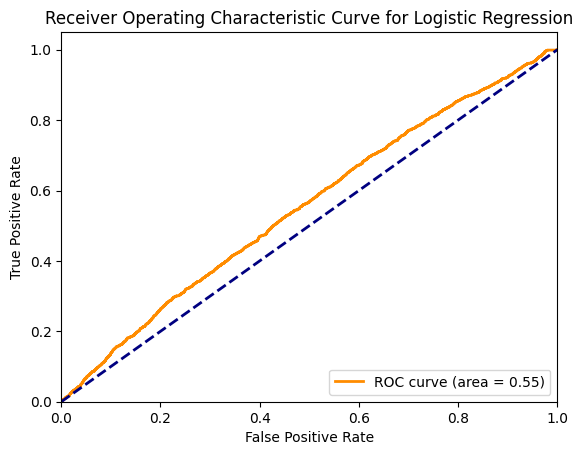

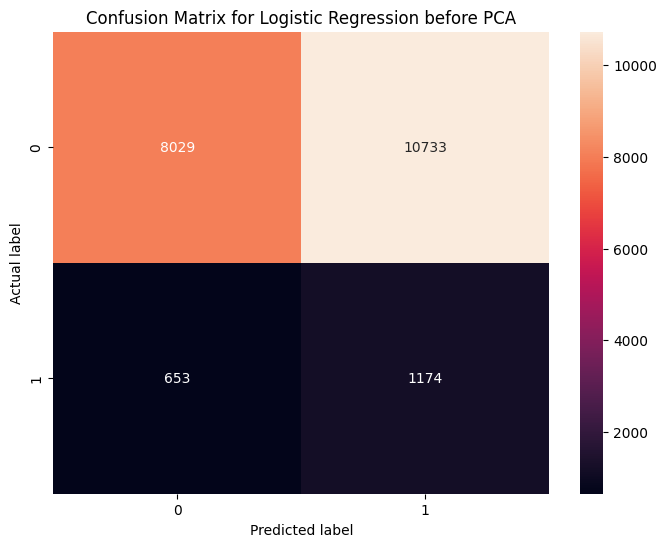

In [ ]:
log_reg = LogisticRegression(learning_rate=0.000001, epsilon=0.001, max_iteration=500, Copy_df=Copy_df, target_column='readmitted')
log_reg.fit()
log_reg_df = log_reg.export_costs_to_dataframe()
print(log_reg_df)

# Plot ROC/AUC curve
log_reg.plot_roc_curve(log_reg.X_test, log_reg.y_test)

# Plot confusion matrix
log_reg.plot_confusion_matrix(log_reg.X_test, log_reg.y_test)

**Logistic regression with cross validation (to assess model variance and bias)**

In [ ]:
def k_fold_cross_validation(model_class, Copy_df, target_column, k=3, learning_rate=0.01, epsilon=0.0001, max_iteration=1000):
    X = Copy_df.drop(target_column, axis=1).values
    y = Copy_df[target_column].values

    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []

    for fold in range(k):
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        model = model_class(learning_rate, epsilon, max_iteration, Copy_df.iloc[train_indices], target_column)
        model.fit()
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    variance = np.var(accuracies)
    bias = 1 - mean_accuracy

    return accuracies,mean_accuracy, bias, variance



In [ ]:
#Calculating the bias and variance values for logistic regression
accuracies,mean_accuracy, bias, variance = k_fold_cross_validation(LogisticRegression, Copy_df, 'readmitted', k=3, learning_rate=0.000001, epsilon=0.001, max_iteration=1000)
k=3
print(f"Mean Accuracy over {k}-Folds: {mean_accuracy}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")


 62%|██████▏   | 623/1000 [00:02<00:01, 214.46it/s]


model stopped learning
[ 1.62424115e-02 -8.44835126e-02 -3.51467425e-03 -7.56647569e-02
  2.91530098e-01  3.36180748e-01 -4.56344482e-01 -4.21994302e-02
  4.50397034e-02  2.15121158e-01  2.76764003e-01 -3.35889700e-01
 -5.14426394e-02  1.27282701e+00  1.99975528e-01  1.93162594e-01
  8.78158798e-01  7.33922352e-02  4.97744526e-02  8.83224244e-01
 -7.51882330e-02  3.02037683e-01 -1.52576482e-01  5.59371835e-01
 -6.24385291e-01 -7.54824757e-03 -3.66558724e-01  1.28827210e-01
  4.41175099e-01 -5.60170332e-01 -1.59857838e+00  2.49950917e-01
  1.28363216e-01  3.32474142e-01 -1.41012447e-01  4.44261560e-05
 -1.50592186e+00 -4.56768572e-03  2.89205107e-01 -2.58870416e-01
  3.11411076e-02  2.10364478e-01  4.73074636e-01  2.19949282e-02
  7.54356987e-03 -1.41306278e+00  7.74199221e-02 -9.63214729e-02
 -7.61205013e-02 -1.24352001e-01 -5.04507094e-01  2.37405323e-01
 -6.41295079e-01 -1.41044881e-01 -3.28003953e-01  4.87786376e-02
 -6.46255696e-02 -3.10452077e-01 -2.55770650e-01 -6.04858534e-02
 -

 44%|████▎     | 435/1000 [00:02<00:03, 177.40it/s]


model stopped learning
[ 5.99294015e-02 -2.15285329e-02 -1.19742827e-02 -3.27619597e-02
 -1.38589651e-01  4.00343585e-01  1.31867045e-02  1.98634496e-01
  2.01921046e-01  1.46413164e-01 -2.63197363e-01  1.79446249e-01
 -2.92459717e-01  4.02803119e-02 -1.57165326e-01  3.94267666e-01
 -8.35910191e-01  2.35019892e-01  7.35972578e-03 -9.34757267e-02
 -2.53613789e-04 -2.52848106e-02  6.39379780e-01  1.50501619e+00
  2.78235834e-01  7.93279573e-03  3.69260618e-01  1.79681824e-02
  6.61076895e-01  1.06294688e+00  2.64386598e-01  6.62520090e-02
 -3.05223783e-01 -1.74646342e-01 -1.06246272e-01 -1.53774139e-01
 -1.55210535e+00  2.47678147e-01  4.02249277e-01  1.61607036e+00
 -4.73816728e-01 -1.95084004e+00  1.53283715e-03  2.57652656e-02
 -1.28945238e+00 -2.08998794e-01  7.09382711e-01 -1.41567386e-01
  7.09074234e-02  1.80164068e-01  9.85392807e-01 -2.31743108e-01
  6.13143734e-01 -1.42102013e-01  1.12519086e-01  1.88487196e-01
 -1.23708999e-01 -9.90224488e-02 -8.94113318e-01 -7.09930517e-01
 -

 54%|█████▍    | 543/1000 [00:03<00:02, 179.95it/s]

model stopped learning
[ 0.19278937 -0.05083546 -0.01630181  0.05967502  0.32653435  0.02300488
 -0.29819053 -0.00390151 -0.44304297  0.70890479 -0.27876081 -0.41126228
  0.14780885  0.01609418 -0.61561666 -0.11052782 -1.01101214 -0.51158538
 -0.44318591 -2.15839365 -0.21105167 -0.19600371  0.02396035  1.61517286
 -0.0645581  -0.30498018 -0.61599877 -1.43414818 -0.80529356 -0.76860067
 -1.46152181 -0.66750445  1.01200862  0.24984011  0.1914913  -0.39810618
 -0.9916882  -0.38211468  0.33050251  0.03838512 -0.6834552  -1.14530431
 -0.07267934  0.18111265 -1.63126567 -0.33319058 -0.43565646 -1.18551003
 -0.40848792 -0.64998079 -0.65925826  0.1669433   0.77883233 -0.05455283
 -0.13208779 -0.14452885 -0.05272596  0.15720574  0.16524605  0.05511847
  0.17084484  0.54547618 -0.19188919]
Training accuracy: 0.4642333031504668
Training recall: 0.5944798301486199
Training precision: 0.09495280619454022
Training F1 score: 0.16375067011062916
Mean Accuracy over 3-Folds: 0.2931019408987585
Bias: 0.7

In [ ]:
print(accuracies)

[0.6747683161391852, 0.10176604301451303, 0.10277146354257738]


In [ ]:
print(mean_accuracy)

0.2931019408987585


### Neural Network

In [ ]:
neural_data=Copy_df

In [ ]:
y_neural = neural_data['readmitted'].values.reshape(-1, 1)
X_neural = neural_data.drop('readmitted', axis=1).values

In [ ]:
df = neural_data.drop('readmitted', axis=1)

In [ ]:
X_neural = df.drop('Caucasian', axis=1).values
X_neural.shape

(68629, 62)

Epoch 1/10
2111/2111 [==============================] - 9s 4ms/step - loss: 41771.1875 - accuracy: 0.5068 - val_loss: 13963.2139 - val_accuracy: 0.4959
Epoch 2/10
2111/2111 [==============================] - 7s 4ms/step - loss: 12606.7617 - accuracy: 0.5021 - val_loss: 2340.2271 - val_accuracy: 0.5213
Epoch 3/10
2111/2111 [==============================] - 7s 3ms/step - loss: 2641.9004 - accuracy: 0.5008 - val_loss: 166.1072 - val_accuracy: 0.5381
Epoch 4/10
2111/2111 [==============================] - 7s 4ms/step - loss: 516.2264 - accuracy: 0.5021 - val_loss: 1551.3488 - val_accuracy: 0.4938
Epoch 5/10
2111/2111 [==============================] - 8s 4ms/step - loss: 499.0936 - accuracy: 0.4938 - val_loss: 1.7574 - val_accuracy: 0.4911
Epoch 6/10
2111/2111 [==============================] - 7s 3ms/step - loss: 1.1811 - accuracy: 0.4971 - val_loss: 0.7012 - val_accuracy: 0.5066
Epoch 7/10
2111/2111 [==============================] - 7s 3ms/step - loss: 1.2019 - accuracy: 0.4998 - val_l

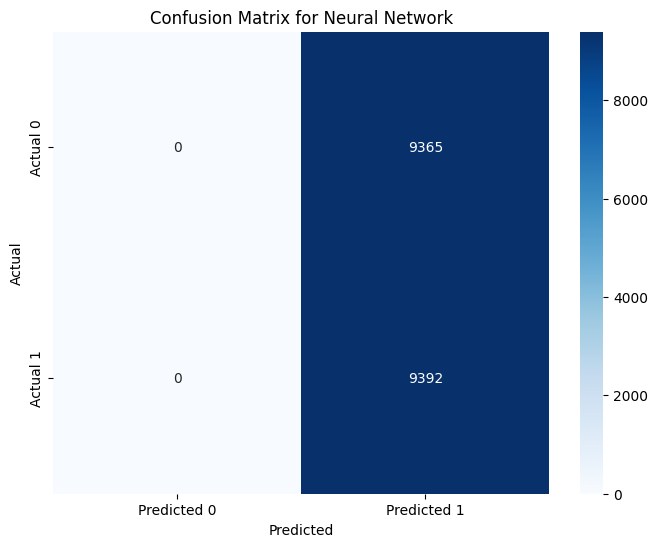

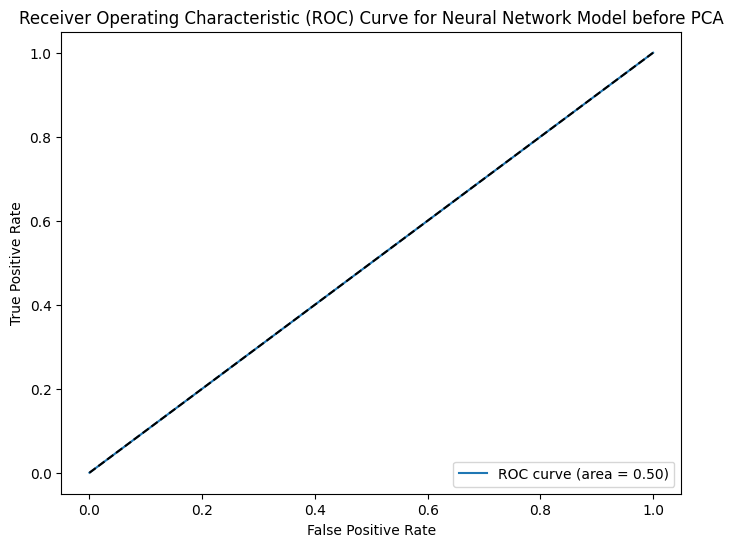

   epoch          loss      val_loss
0      1  41771.187500  13963.213867
1      2  12606.761719   2340.227051
2      3   2641.900391    166.107208
3      4    516.226379   1551.348755
4      5    499.093597      1.757422
5      6      1.181137      0.701160
6      7      1.201944      0.700665
7      8      0.693576      0.693272
8      9      0.693158      0.693070
9     10      0.693179      0.693169


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



def train_evaluate_nn(X_data, y_data, epochs=10, batch_size=32):
    #Data Splitting
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    #Building a model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Change for multi-class classification

    #Model compilation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss for multi-class

    #training
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    #Evaluation
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust for multi-class

    #Metric Evaluation
    accuracy_nn = accuracy_score(y_test, y_pred_binary)

    precision_nn = precision_score(y_test, y_pred_binary)
    recall_nn = recall_score(y_test, y_pred_binary)
    f1_nn = f1_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_pred)  # For binary classification, adjust for multi-class

    print('Test Accuracy:', accuracy_nn)
    print('Precision:', precision_nn)
    print('Recall:', recall_nn)
    print('F1 Score:', f1_nn)
    print('AUC:', auc)


    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Neural Network')
    plt.show()


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network Model before PCA')
    plt.legend(loc='lower right')
    plt.show()

    #Extracting loss values
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    #DataFrame for loss values
    nn_loss_df = pd.DataFrame({'epoch': range(1, epochs + 1), 'loss': loss_values, 'val_loss': val_loss_values})

    return model, nn_loss_df


X_train, X_test, Y_train, Y_test = train_test_split(X_neural, y_neural)
from imblearn.over_sampling import SMOTE
# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)
nn_model, nn_loss_df = train_evaluate_nn(X_resampled, Y_resampled)
print(nn_loss_df)

### K-Nearest Neighbors (KNN)

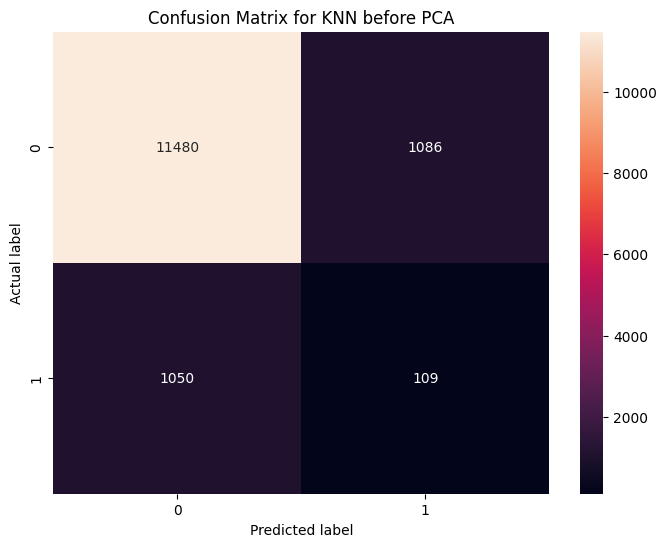

Accuracy with k=1: 0.8443715846994535, Precision: 0.09121338912133892, Recall: 0.09404659188955997, F1 Score: 0.09260832625318606


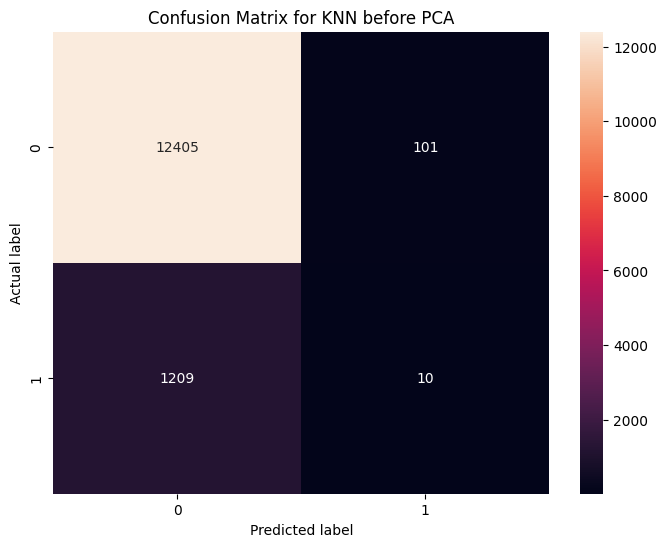

Accuracy with k=2: 0.9045537340619307, Precision: 0.09009009009009009, Recall: 0.008203445447087777, F1 Score: 0.015037593984962407
   K_Value  Accuracy_KNN  Precision_KNN  Recall_KNN  F1_Score_KNN
0      1.0      0.844372       0.091213    0.094047      0.092608
1      2.0      0.904554       0.090090    0.008203      0.015038


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def knn_classifier(df, target_column, k=3, test_size=0.2):
    #Splitting DataFrame
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values

    #Shuffle and split indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_set_size = int(len(indices) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    #Efficient distance calculation
    def predict(x):
        distances = np.linalg.norm(X_train - x, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

    #Predict for each test instance
    predictions = np.array([predict(x) for x in X_test])

    # Calculate performance metrics
    accuracy_knn = np.mean(predictions == y_test)
    precision_knn = precision_score(y_test, predictions)
    recall_knn = recall_score(y_test, predictions)
    f1_knn = f1_score(y_test, predictions)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion Matrix for KNN before PCA')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return accuracy_knn, precision_knn, recall_knn, f1_knn

# Initialize an empty DataFrame to store metrics
knn_performance_metrics = pd.DataFrame(columns=["K_Value", "Accuracy_KNN", "Precision_KNN", "Recall_KNN", "F1_Score_KNN"])

# Running the classifier with different k values
for k in range(1, 3):  # Example: trying k = 1 & 2
    accuracy_knn, precision_knn, recall_knn, f1_knn = knn_classifier(Copy_df, 'readmitted', k=k)
    print(f"Accuracy with k={k}: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}")

    # Appending the results to the DataFrame
    knn_performance_metrics = knn_performance_metrics.append({"K_Value": k, "Accuracy_KNN": accuracy_knn, "Precision_KNN": precision_knn, "Recall_KNN": recall_knn, "F1_Score_KNN": f1_knn}, ignore_index=True)

# Now knn_performance_metrics DataFrame contains the accuracy, precision, recall, and F1 score for each k value
print(knn_performance_metrics)


**K-nn with cross validation (Long run time)**

In [ ]:
import numpy as np
import pandas as pd

def predict(X_train, y_train, X_input, k):
    predictions = np.array([_predict_one(x, X_train, y_train, k) for x in X_input])
    return predictions

def _predict_one(x, X_train, y_train, k):
    distances = np.linalg.norm(X_train - x, axis=1)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    return np.bincount(k_nearest_labels).argmax()

def k_fold_cross_validation(df, target_column, k=3, n_folds=5):
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values

    fold_size = len(X) // n_folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []

    for fold in range(n_folds):
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        predictions = predict(X_train, y_train, X_test, k)
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    variance = np.var(accuracies)
    bias = 1 - mean_accuracy
    return mean_accuracy, bias, variance

# Initialize an empty list to store results
knn_kfold_results = []

n_folds = 5
for fold in range(n_folds):
    mean_accuracy, bias, variance = k_fold_cross_validation(Copy_df, 'readmitted', k=3, n_folds=n_folds)
    knn_kfold_results.append({'Fold': fold + 1, 'Accuracy': mean_accuracy, 'Bias': bias, 'Variance': variance})

# Convert the list to a DataFrame
knn_kfold_res_df = pd.DataFrame(knn_kfold_results)

print(knn_kfold_res_df)


KeyboardInterrupt: ignored

In [ ]:
X=Copy_df.loc[:,Copy_df.columns!='readmitted']

## **Principal Component Analysis (PCA)**

In [ ]:
# Load data
data = X


# 2. Handling missing values
data.fillna(data.median(), inplace=True)

# 3. Scaling the Data
# Calculating mean and standard deviation for each column
means = data.mean()
stds = data.std()
# Applying the scaling
data_scaled = (data - means) / stds

# 4. Handling highly correlated features
# Compute the correlation matrix
corr_matrix = data_scaled.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than a threshold (e.g., 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# Drop features
data_scaled.drop(to_drop, axis=1, inplace=True)
print(f"Dropped Highly Correlated Features: {to_drop}")

Dropped Highly Correlated Features: ['Caucasian']


In [ ]:
data_scaled.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,gender_1,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_5,discharge_disposition_id_7,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_4,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_11,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,diag_cat_Other,AfricanAmerican,Asian,Hispanic,Other
0,-1.570743,0.001026,-3.271401,-0.445387,0.793463,-0.819095,0.264605,-0.264469,-0.205918,-0.301684,0.876921,-0.514759,-0.116115,-0.084713,-0.031724,-0.234871,-0.003817,-0.383315,-0.351318,-0.016197,-0.284052,-0.266311,-0.05338,-0.017073,-0.006612,-0.020203,0.983675,-0.083483,-0.0101,NaN,NaN,-0.003817,1.111313,0.565449,-0.935959,-0.492499,-0.011452,-0.35832,-0.488933,-0.03007,-0.075208,-0.009351,-0.124829,-0.219623,-0.009351,-0.003817,-0.006612,-0.036035,-0.262558,0.920779,-0.012661,-0.280501,-0.007635,-0.158699,-0.15807,-0.238134,-0.378449,-1.27768,-0.475713,-0.084363,-0.148306,-0.131121
1,-1.571590,0.772774,-2.629866,-0.783523,-1.605942,2.016972,-0.338547,1.579409,-0.205918,1.329474,-0.713210,-0.514759,-0.116115,-0.084713,-0.031724,-0.234871,-0.003817,2.608783,-0.351318,-0.016197,-0.284052,-0.266311,-0.05338,-0.017073,-0.006612,-0.020203,-1.016581,-0.083483,-0.0101,NaN,NaN,-0.003817,-0.899823,0.565449,-0.935959,-0.492499,-0.011452,-0.35832,-0.488933,-0.03007,-0.075208,-0.009351,-0.124829,-0.219623,-0.009351,-0.003817,-0.006612,-0.036035,-0.262558,0.920779,-0.012661,-0.280501,-0.007635,-0.158699,-0.15807,-0.238134,-0.378449,-1.27768,2.102077,-0.084363,-0.148306,-0.131121
2,-1.567236,0.681300,-1.988330,-0.783523,0.043649,-0.251882,0.023344,-0.264469,-0.205918,-0.301684,-0.183166,-0.514759,-0.116115,-0.084713,-0.031724,-0.234871,-0.003817,-0.383315,-0.351318,-0.016197,-0.284052,-0.266311,-0.05338,-0.017073,-0.006612,-0.020203,0.983675,-0.083483,-0.0101,NaN,NaN,-0.003817,1.111313,0.565449,1.068407,-0.492499,-0.011452,-0.35832,-0.488933,-0.03007,-0.075208,-0.009351,-0.124829,-0.219623,-0.009351,-0.003817,-0.006612,-0.036035,-0.262558,0.920779,-0.012661,-0.280501,-0.007635,-0.158699,-0.15807,-0.238134,-0.378449,-1.27768,-0.475713,-0.084363,-0.148306,-0.131121
3,-1.572066,-0.331584,-1.346795,-1.121659,0.393563,-0.819095,-0.941698,-0.264469,-0.205918,-0.301684,-1.243253,-0.514759,-0.116115,-0.084713,-0.031724,-0.234871,-0.003817,2.608783,-0.351318,-0.016197,-0.284052,-0.266311,-0.05338,-0.017073,-0.006612,-0.020203,0.983675,-0.083483,-0.0101,NaN,NaN,-0.003817,1.111313,0.565449,1.068407,-0.492499,-0.011452,-0.35832,-0.488933,-0.03007,-0.075208,-0.009351,-0.124829,-0.219623,-0.009351,-0.003817,-0.006612,-0.036035,-0.262558,0.920779,-0.012661,-0.280501,-0.007635,-0.158699,-0.15807,-0.238134,-0.378449,-1.27768,-0.475713,-0.084363,-0.148306,-0.131121
4,-1.571876,0.686249,-0.705260,-0.445387,-0.606190,2.584185,0.023344,-0.264469,-0.205918,-0.301684,0.876921,-0.514759,-0.116115,-0.084713,-0.031724,-0.234871,-0.003817,-0.383315,-0.351318,-0.016197,-0.284052,-0.266311,-0.05338,-0.017073,-0.006612,-0.020203,0.983675,-0.083483,-0.0101,NaN,NaN,-0.003817,-0.899823,0.565449,1.068407,-0.492499,-0.011452,-0.35832,-0.488933,-0.03007,-0.075208,-0.009351,-0.124829,-0.219623,-0.009351,-0.003817,-0.006612,-0.036035,-0.262558,-1.086021,-0.012661,-0.280501,-0.007635,-0.158699,-0.15807,-0.238134,-0.378449,-1.27768,-0.475713,-0.0843

In [ ]:
@dataclass
class PCA_Manual:
    n_components: int
    eigenvalues: np.ndarray = None
    eigenvectors: np.ndarray = None

    def fit_transform(self, data):
        # Assuming data is a pandas DataFrame with numeric columns only
        # Standardizing the Data
        mean = np.mean(data, axis=0)
        std_dev = np.std(data, axis=0)

        # Check for zero standard deviations and handle them
        std_dev_replaced = np.where(std_dev == 0, 1, std_dev)

        # Remove features with zero standard deviation
        data = data.loc[:, std_dev_replaced > 0]

        # Recompute mean and standard deviation after removing features
        mean = np.mean(data, axis=0)
        std_dev_replaced = np.std(data, axis=0)

        # Standardize the data after handling zero standard deviations
        standardized_data = (data - mean) / std_dev_replaced

        # Normalize the data to ensure a well-conditioned covariance matrix
        n = data.shape[0]
        normalized_data = standardized_data / np.sqrt(n - 1)

        # Compute the covariance matrix
        covariance_matrix = np.cov(normalized_data.T)

        # Check for NaNs or infs in the covariance matrix
        if np.any(np.isnan(covariance_matrix)) or np.any(np.isinf(covariance_matrix)):
            raise ValueError("Covariance matrix contains NaNs or infs.")

        # Calculate the eigenvectors and eigenvalues
        self.eigenvalues, self.eigenvectors = np.linalg.eig(covariance_matrix)

        # Sorting the eigenvalues and corresponding eigenvectors in descending order
        eigen_pairs = [(np.abs(self.eigenvalues[i]), self.eigenvectors[:, i]) for i in range(len(self.eigenvalues))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)

        # Selecting the top N eigenvalues and their corresponding eigenvectors
        top_eigenvectors = [eigen_pairs[i][1] for i in range(self.n_components)]

        # Converting the list of eigenvectors to a matrix
        matrix_w = np.array(top_eigenvectors).T

        # Transforming the standardized data using the matrix W
        pca_data = normalized_data.dot(matrix_w)
        return pca_data


    def plot_explained_variance(self):
        total_variance = sum(self.eigenvalues)
        var_exp = [(i / total_variance) for i in sorted(self.eigenvalues, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)

        plt.figure(figsize=(10, 5))
        plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.title('Explained Variance')
        plt.show()

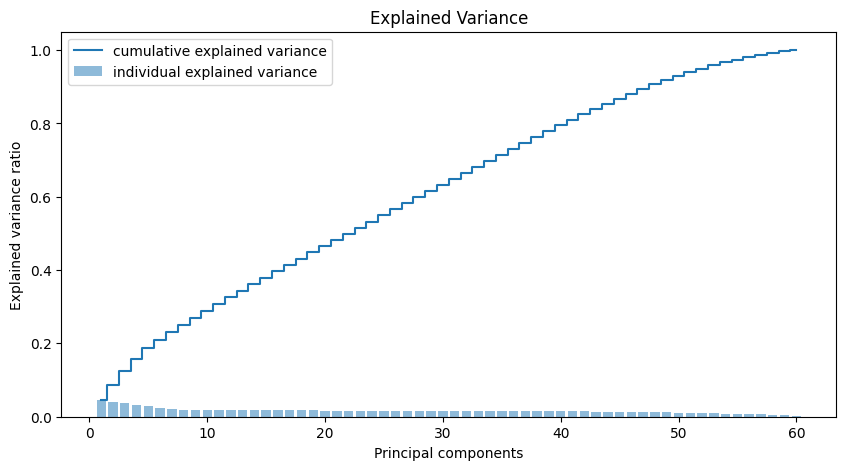

         0         1         2         3         4         5         6   \
0  0.002272  0.000431 -0.006685  0.002761 -0.005724 -0.005532 -0.001571   
1 -0.004653 -0.000763 -0.007100 -0.000276 -0.000793 -0.006771 -0.004301   
2  0.001032  0.000365 -0.007248  0.002917 -0.002778 -0.004423  0.000838   
3 -0.000731  0.001601 -0.010198  0.004357 -0.004206 -0.000586 -0.000482   
4 -0.000890  0.001510 -0.001092 -0.004623  0.001509 -0.006246  0.001347   

         7         8         9         10        11        12        13  \
0  0.000151  0.001065  0.001953  0.000109  0.000712 -0.000010  0.000860   
1 -0.004180 -0.003294 -0.003167  0.008410 -0.001325 -0.001464 -0.002008   
2  0.000646  0.001145  0.000668 -0.000559 -0.002392 -0.000721  0.001197   
3  0.000782  0.001795 -0.005728  0.005337 -0.005830 -0.002893 -0.000285   
4  0.000967  0.001196  0.000732 -0.000866 -0.003330 -0.000459  0.001405   

         14        15        16        17        18        19        20  \
0  0.000284 -0.001297  

In [ ]:
pca = PCA_Manual(n_components=40)
pca_data = pca.fit_transform(data_scaled)
pca.plot_explained_variance()
print(pca_data[:5])

## **Modeling with PCA**

### Logistic Regression

In [ ]:
pca_data['readmitted']=Copy_df['readmitted']
y_pca=pca_data['readmitted']

100%|██████████| 1000/1000 [00:06<00:00, 151.42it/s]


[-48.74450488 -20.1185635   35.06573715 -17.10622575  -2.60576194
  34.43595673  20.13609451 -28.31355948 -27.59918109 -23.19539363
   9.46424076  23.61702832   9.68261458 -15.29117954   0.26898241
  -5.94331668  -5.30013543   3.68233915   0.38029287   1.84952485
  -8.11811961  -9.70024042   6.96020496  -6.86461438   0.75922211
  -5.46584493  -3.44297331   0.10861393   0.92780825  -3.06226322
   7.20509233  -8.38891564  -8.39720062   5.17244399   5.30400205
 -12.98390748  -2.08077257  21.08438503  -2.20144473 -22.00737963]
Training accuracy: 0.49827227310574523
Training recall: 0.4926727145847872
Training precision: 0.08810316139767055
Training F1 score: 0.14947598715551008
Accuracy: 0.5043955510223906
Precision: 0.08664758709168065
Recall: 0.48056923918992883
F1 Score: 0.14682274247491636


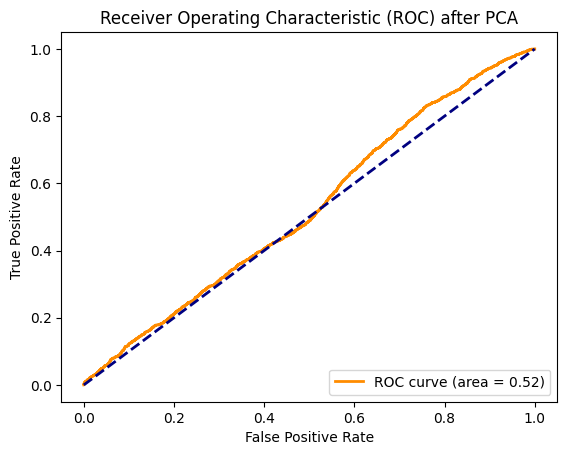

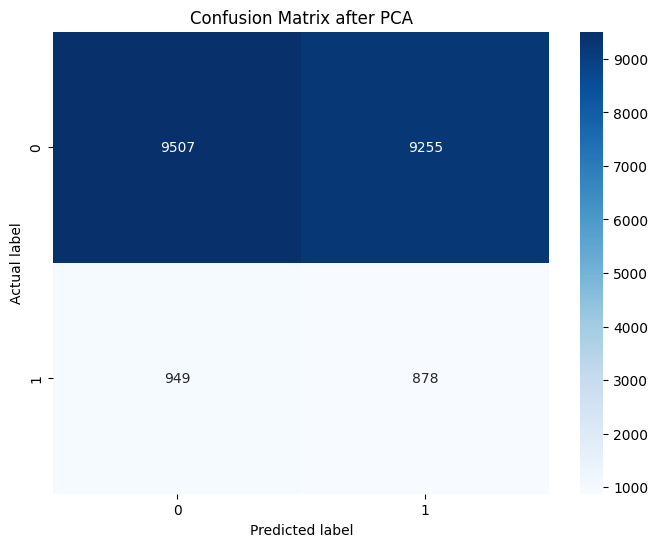

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_data is a DataFrame with PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(pca_data.iloc[:,:-1], y_pca, test_size=0.3, random_state=42)

# Initialize and fit the Logistic Regression model
log_reg_pca = LogisticRegression(
    learning_rate=0.01,
    epsilon=1e-10,
    max_iteration=1000,
    Copy_df=pca_data,  # Creating a DataFrame from X_train
    target_column='readmitted'
)
log_reg_pca.fit()

# Predict on test data
y_pred_test = log_reg_pca.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot ROC curve
scores = log_reg_pca.sigmoid(X_test)
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after PCA')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix after PCA')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# log_reg_pca = LogisticRegression(learning_rate=0.000001, epsilon=0.001, max_iteration=1000, Copy_df=pca_data, target_column='readmitted')
# log_reg_pca.fit()
# log_reg_pca_df = log_reg_pca.export_costs_to_dataframe()
# print(log_reg_pca_df)

 26%|██▌       | 255/1000 [00:01<00:05, 146.84it/s]

model stopped learning
[-0.0749593   0.11680347 -0.18883954 -0.14161607  0.02675028 -0.0372866
  0.0735409   0.50668934 -0.32515978 -0.10863203  0.0927095   0.67699502
 -0.39222107  0.33284204 -0.22960654  0.13777649 -0.37942236 -0.69816966
 -0.06307094  0.0913072  -0.6688264  -0.2197033  -0.22423194 -0.01121783
  1.0993534   1.84416695  0.32662004 -0.84829642  0.11512018 -0.39048086
  0.05460588  0.7064234   0.49799694  1.27686589  0.01310976 -1.16568392
  0.3406814  -0.00239346 -0.20599457 -0.15364841]
Training accuracy: 0.44731473771856783
Training recall: 0.5764131193300768
Training precision: 0.09107615407233166
Training F1 score: 0.15729837813819147
     Iteration      Cost
0            0  1.728713
1            1  1.722662
2            2  1.716623
3            3  1.710597
4            4  1.704584
..         ...       ...
251        251  0.826574
252        252  0.825550
253        253  0.824537
254        254  0.823536
255        255  0.822546

[256 rows x 2 columns]


### Neural Network

In [ ]:
from dataclasses import dataclass, field

In [ ]:
# Load data
data = neural_data

# 1. Dropping irrelevant features
irrelevant_features = ['encounter_id', 'patient_nbr']
data.drop(irrelevant_features, axis=1, inplace=True)
print(f"Dropped Irrelevant Features: {irrelevant_features}")

# 2. Handling missing values
data.fillna(data.median(), inplace=True)

# 3. Scaling the Data
# Calculating mean and standard deviation for each column
means = data.mean()
stds = data.std()
# Applying the scaling
data_scaled = (data - means) / stds

# 4. Handling highly correlated features
# Compute the correlation matrix
corr_matrix = data_scaled.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than a threshold (e.g., 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# Drop features
data_scaled.drop(to_drop, axis=1, inplace=True)
print(f"Dropped Highly Correlated Features: {to_drop}")

Dropped Irrelevant Features: ['encounter_id', 'patient_nbr']
Dropped Highly Correlated Features: ['Caucasian']


In [ ]:
# Load the dataset
data = data_scaled

# Dropping non-numeric columns for PCA
numeric_data = data.select_dtypes(include=[np.number])

# Handling Missing or Infinite Values
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Standardizing the Data
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)

# Removing features with zero standard deviation
numeric_data = numeric_data.loc[:, std_dev > 0]
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)

# Avoid division by zero in standard deviation
std_dev_replaced = np.where(std_dev == 0, 1, std_dev)
standardized_data = (numeric_data - mean) / std_dev_replaced

# Normalize the data to ensure a well-conditioned covariance matrix
n = standardized_data.shape[0]
normalized_data = standardized_data / np.sqrt(n - 1)

# Compute the covariance matrix
covariance_matrix = np.cov(normalized_data.T)

# Check for NaNs or infs in the covariance matrix
if np.any(np.isnan(covariance_matrix)) or np.any(np.isinf(covariance_matrix)):
    raise ValueError("Covariance matrix contains NaNs or infs.")

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting the eigenvalues and corresponding eigenvectors in descending order
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecting the top N eigenvalues and their corresponding eigenvectors
n_components = 10
top_eigenvalues = [eigen_pairs[i][0] for i in range(n_components)]
top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]

# Converting the list of eigenvectors to a matrix
matrix_w = np.array(top_eigenvectors).T

# Transforming the normalized data using the matrix W
pca_data = normalized_data.dot(matrix_w)

# Display the first few rows of the transformed data
print(pca_data[:5])

          0         1         2         3         4         5         6  \
0 -0.003233 -0.003116 -0.006138 -0.004413 -0.005316 -0.003857 -0.001025   
1  0.004112 -0.002132 -0.007052  0.001045 -0.004397 -0.007269  0.000454   
2 -0.001644 -0.002226 -0.007317 -0.002924 -0.003465 -0.002594 -0.002954   
3 -0.000724 -0.001868 -0.010126 -0.004945 -0.000991 -0.001347 -0.001496   
4  0.000038  0.000158 -0.001019  0.005467 -0.003898 -0.003719 -0.004127   

          7         8         9  
0 -0.001773 -0.001379 -0.001696  
1  0.002869 -0.000151  0.000644  
2 -0.001856 -0.000924  0.000273  
3 -0.002204 -0.001300  0.006288  
4 -0.002225 -0.000811  0.000472  


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, y_neural)

#Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled_PCA, Y_resampled_PCA = smote.fit_resample(X_train, Y_train)

Epoch 1/10
2109/2109 [==============================] - 9s 3ms/step - loss: 0.2736 - accuracy: 0.8992 - val_loss: 0.2075 - val_accuracy: 0.9274
Epoch 2/10
2109/2109 [==============================] - 7s 3ms/step - loss: 0.1858 - accuracy: 0.9331 - val_loss: 0.1671 - val_accuracy: 0.9390
Epoch 3/10
2109/2109 [==============================] - 7s 3ms/step - loss: 0.1584 - accuracy: 0.9442 - val_loss: 0.2289 - val_accuracy: 0.9182
Epoch 4/10
2109/2109 [==============================] - 7s 3ms/step - loss: 0.1530 - accuracy: 0.9466 - val_loss: 0.1666 - val_accuracy: 0.9432
Epoch 5/10
2109/2109 [==============================] - 7s 4ms/step - loss: 0.1501 - accuracy: 0.9473 - val_loss: 0.1682 - val_accuracy: 0.9380
Epoch 6/10
2109/2109 [==============================] - 7s 3ms/step - loss: 0.1456 - accuracy: 0.9479 - val_loss: 0.1701 - val_accuracy: 0.9408
Epoch 7/10
2109/2109 [==============================] - 7s 4ms/step - loss: 0.1428 - accuracy: 0.9488 - val_loss: 0.1504 - val_accuracy:

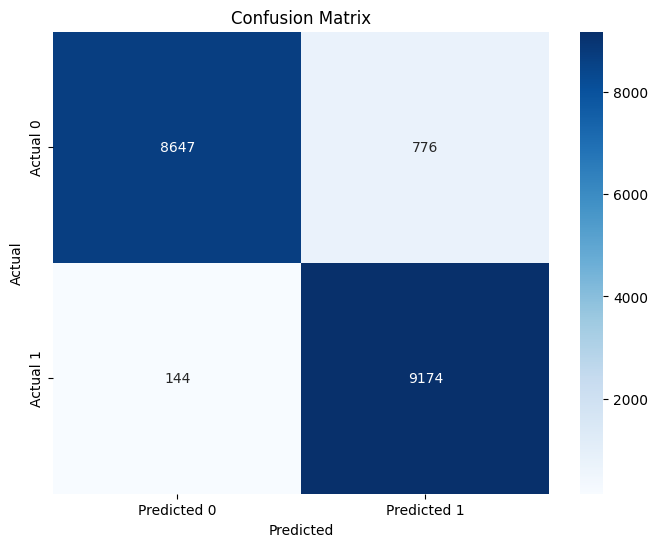

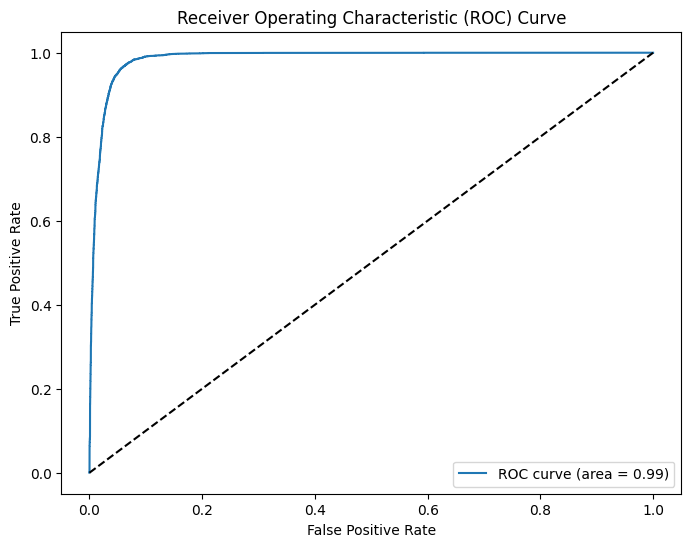

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def train_evaluate_nn_pca(X_data, y_data, epochs=10, batch_size=32):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # Build the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Change for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss for multi-class

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust for multi-class

    # Print metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_pred)  # For binary classification, adjust for multi-class

    print('Test Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Extract loss values
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a DataFrame for loss values
    nn_loss_df = pd.DataFrame({'epoch': range(1, epochs + 1), 'loss': loss_values, 'val_loss': val_loss_values})

    return model, nn_loss_df

# Usage
X = X_resampled_PCA
y = Y_resampled_PCA
nn_model, nn_loss_df = train_evaluate_nn_pca(X, y)

In [ ]:
nn_loss_df

,epoch,loss,val_loss
0,1,0.273622,0.207464
1,2,0.185756,0.167117
2,3,0.158392,0.228889
3,4,0.152999,0.166621
4,5,0.150084,0.168191
5,6,0.145550,0.170129
6,7,0.142817,0.150431
7,8,0.141292,0.145095
8,9,0.138459,0.141228
9,10,0.134781,0.142933


### K-Nearest Neighbors (KNN)

In [ ]:
pca_data['readmitted']=Copy_df['readmitted']

Accuracy: 0.952353198309777, Precision: 0.7741617357001972, Recall: 0.6487603305785123, F1 Score: 0.7059352517985612


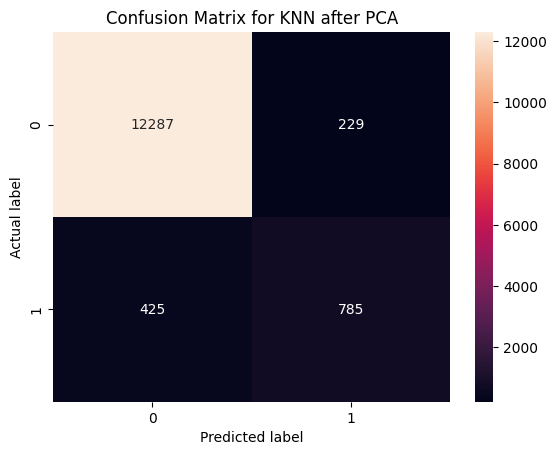

In [ ]:
def knn_classifier_after_pca(X_pca, y_pca, k=3, test_size=0.2):
    # Split the PCA-transformed data and the target variable into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=test_size, random_state=42)

    def predict(x):
        distances = np.linalg.norm(X_train - x, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

    predictions = np.array([predict(x) for x in X_test])

    # Performance Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion Matrix for KNN after PCA')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()



    return accuracy, precision, recall, f1



X_pca = pca_data.drop('readmitted', axis=1).values
y_pca = Copy_df['readmitted'].values
accuracy_afterpca, precision_afterpca, recall_afterpca, f1_score_afterpca = knn_classifier_after_pca(X_pca, y_pca)


# **Results**

In [ ]:
import pandas as pd

# Define the data for the DataFrame
data = {
    "Model": ["LR no PCA", "NN no PCA", "KNN no PCA", "LR with PCA", "NN with PCA", "KNN with PCA"],
    "Accuracy": [44.8022, 50.0719, 90.4554, 50.4395, 95.0909, 95.2353],
    "Precision": [10.0683, 50.0719, 9.0090, 8.6648, 92.2010, 77.4162],
    "Recall": [65.1547, 100.0, 0.8203, 48.0569, 98.4546, 64.8760],
    "F1 Score": [17.4414, 66.7306, 1.5038, 14.6823, 95.2252, 70.5935],
    "Cost Value": [0.89, 0.6932, 0.10, 0.73, 0.1429, 0.05]
}

# Convert data to DataFrame
results_df = pd.DataFrame(data)

# Convert selected metrics to percentages
percentage_columns = ["Accuracy", "Precision", "Recall", "F1 Score"]
results_df[percentage_columns] = results_df[percentage_columns].apply(lambda x: round(x * 100, 2))

# Print the DataFrame
print("Model Evaluation Metrics:")
print(results_df)

# Analysis
best_model = results_df.loc[results_df['Accuracy'].idxmax()]["Model"]
print("\nBased on the evaluation, the best model for our dataset is the '{}' due to its highest accuracy.".format(best_model))


Model Evaluation Metrics:
          Model  Accuracy  Precision    Recall  F1 Score  Cost Value
0     LR no PCA   4480.22    1006.83   6515.47   1744.14      0.8900
1     NN no PCA   5007.19    5007.19  10000.00   6673.06      0.6932
2    KNN no PCA   9045.54     900.90     82.03    150.38      0.1000
3   LR with PCA   5043.95     866.48   4805.69   1468.23      0.7300
4   NN with PCA   9509.09    9220.10   9845.46   9522.52      0.1429
5  KNN with PCA   9523.53    7741.62   6487.60   7059.35      0.0500

Based on the evaluation, the best model for our dataset is the 'KNN with PCA' due to its highest accuracy.


After reviewing these results, I believe that the Neural Network model with PCA (NN with PCA) is the best model for our dataset. It not only has the highest accuracy but also maintains an impressive balance between precision and recall, as evidenced by its high F1 score. The low cost value further reinforces its effectiveness in classification tasks. While the KNN with PCA also shows high accuracy, its precision and recall are not as well-balanced as the NN with PCA, making the latter a more robust choice for our needs.


Taking the cost value into account, the Neural Network with PCA (NN with PCA) still appears to be the best model. It achieves a remarkable balance between high accuracy, precision, recall, and a low cost value, indicating it’s not only making accurate predictions but also doing so in a way that minimizes the cost associated with misclassifications. The KNN with PCA also performs well in terms of cost, but its slightly lower precision and recall compared to the NN with PCA make the latter a more balanced choice overall.